# DataCamp Project: Risk and Returns Using Sharpe Ratio.

The main purpose of this project is to decide which of the two stocks would be an great investment. Using the Sharpe Ratio will give enough information for Amazon and Facebook. We are given two separate datasets containing the historical stock prices and stock market indexes of Fortune 500 companies in the year of 2016. We will be calculating daily returns, excess returns, standard deviation, and average excess returns on stocks. The standard deviation is used as the risk factor for the stocks. At the end of this project, the Sharpe Ratio will help us pick between Amazon and Facebook.

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the data
stock_data = pd.read_csv('stock_data.csv', parse_dates = ['Date'], 
                         index_col = ['Date'], na_values = 'NAN')
benchmark_data = pd.read_csv('benchmark_data.csv', parse_dates = ['Date'], 
                             index_col = ['Date'], na_values = 'NAN')

In [3]:
# Check for any missing values and drop them
stock_data.isnull().sum()
benchmark_data.isnull().sum()

benchmark_data.dropna(inplace=True)

In [4]:
# Displaying Content of each data
print(stock_data.info())
print(benchmark_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


In [7]:
# View the first five rows
stock_data.head()

,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [8]:
benchmark_data.head()

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


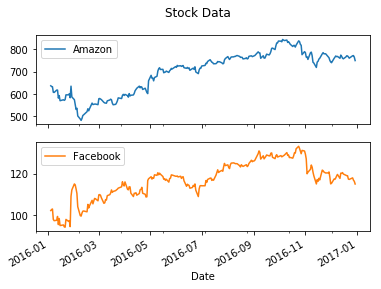

In [9]:
# Visualizing and Summarizing Facebook and Amazon's stocks
stock_data.plot(subplots=True, title = 'Stock Data')
plt.savefig('Stock_Data.pdf')

In [10]:
# Get the summary of the stock data
stock_data.describe()

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


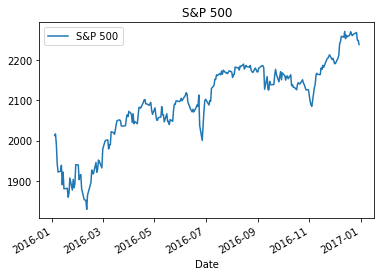

In [11]:
# Visualizing and Summarizing S&P 500
benchmark_data.plot(title = 'S&P 500')

In [12]:
# Get the summary of the S&P 500 data
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [13]:
# Calculate the Daily returns on stocks
stock_returns = stock_data.pct_change()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11eedfdd8>,
      dtype=object)

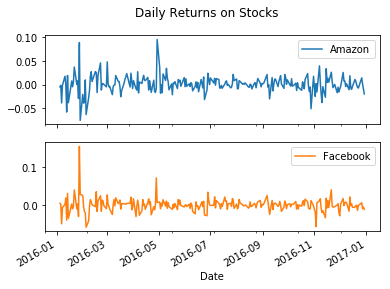

In [14]:
# Plot the daily stock returns
stock_returns.plot(subplots=True, title = 'Daily Returns on Stocks')

In [16]:
# Summarizing the stock returns
stock_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [17]:
# S&P returns
sp_returns = pd.Series(benchmark_data['S&P 500'].pct_change())

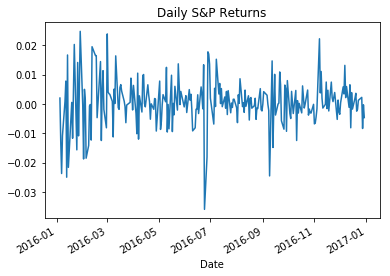

In [18]:
# Plot the S&P 500 Returns
sp_returns.plot(title = 'Daily S&P Returns')

In [19]:
# Summarize the S&P 500 returns
sp_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

In [20]:
# Excess Returns Calculations
excess_returns = stock_returns.sub(sp_returns, axis=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f188780>,
      dtype=object)

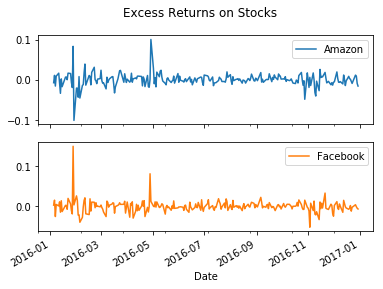

In [21]:
# Visualization of the Excess Returns
excess_returns.plot(subplots=True, title='Excess Returns on Stocks')

In [22]:
excess_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


In [23]:
# Calculating the Average Excess Returns on Stocks
avg_excess_returns = excess_returns.mean()

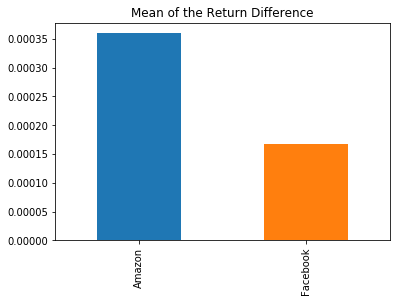

In [24]:
avg_excess_returns.plot.bar(title='Mean of the Return Difference')

In [25]:
# Getting the Standard deviation of the Excess Returns
sd_excess_returns = excess_returns.std()

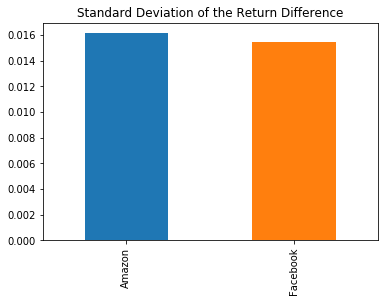

In [26]:
# Comparing the Standard Deviations of the Excess Returns
sd_excess_returns.plot.bar(title='Standard Deviation of the Return Difference')

In [29]:
## Applying the Sharpe Ratio 
daily_sharpe_ratio = avg_excess_returns.div(sd_excess_returns)

# The Annual Factor
We want to annualize the sharpe ratio. We do this by getting the number of trading days in a year which is 252. Next, we take the square root of 252 and multiply it to the daily sharpe ratio.

In [28]:
annual_factor = np.sqrt(252)

In [30]:
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

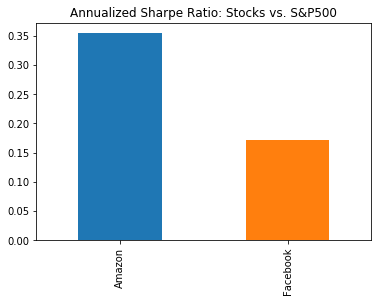

In [31]:
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs. S&P500')

# Which stock should we invest in?
Based on the results, Amazon would be the stock to invest in. The reason for this is that we are seeing higher returns from our investment based on risk rate. The higher risk gives us a higher payoff on the returns. If you are risk averse, then Facebook would be the alternative. On top of the numerical factors we just analyzed, other qualitative factors such as leadership, policies, and societies influence how the general trends in the industries and other factors are viewed with these changes and outlooks.